### 라이브러리

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 데이터로드

In [9]:
# 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x286861dc0>)

In [10]:
# txt : pandas
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [11]:
len(train_data)  # 150000

150000

In [12]:
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [13]:
len(test_data)  # 1/3

50000

## 데이터전처리

In [15]:
train_data['document'].duplicated().sum()

3817

In [17]:
train_data['document'].nunique()  # 중복이 존재

146182

In [18]:
# 중복제거
train_data = train_data.drop_duplicates(subset=['document'])

In [19]:
len(train_data)

146183

### EDA

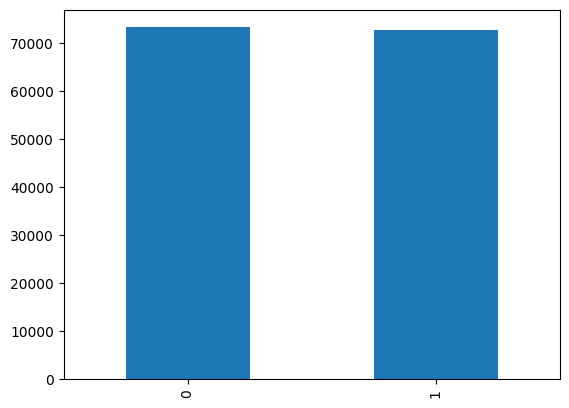

In [23]:
train_data['label'].value_counts().plot.bar()
plt.show()

In [24]:
train_data['label'].value_counts()

0    73342
1    72841
Name: label, dtype: int64

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146183 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        146183 non-null  int64 
 1   document  146182 non-null  object
 2   label     146183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.5+ MB


In [28]:
train_data.isna().sum()

id          0
document    1
label       0
dtype: int64

In [32]:
train_data[train_data['document'].isna()]

,id,document,label
25857,2172111,NaN,1


In [36]:
train_data = train_data.dropna(subset='document').reset_index(drop=True)

In [37]:
train_data.isna().sum()

id          0
document    0
label       0
dtype: int64

### 텍스트 전처리